# K MeansClustering

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

dataset= pd.read_csv('./CC GENERAL.csv')
      
# checking the presence of null values
print(dataset.isnull().sum())
 #CREDIT_LIMIT                          1
 #MINIMUM_PAYMENTS                    313
 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [3]:
dataset['CREDIT_LIMIT'].fillna(dataset.CREDIT_LIMIT.mean(), inplace = True)
dataset['MINIMUM_PAYMENTS'].fillna(dataset.MINIMUM_PAYMENTS.mean(), inplace = True) # using mean

print(dataset.isnull().sum())

print(dataset.describe())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min    

In [4]:
dataset.drop(['CUST_ID'], axis= 1, inplace = True)

# No Categorical Values found
X = dataset.iloc[:,:].values

# Using standard scaler
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
X = standardscaler.fit_transform(X)
print(X)


[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


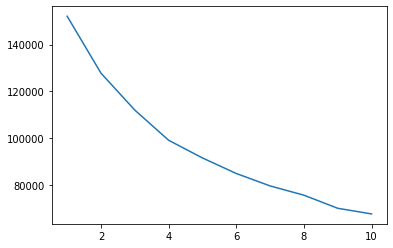

In [5]:

"""K MEANS CLUSTERING """
#Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are
from sklearn.cluster import KMeans
wss= []
for i in range(1, 11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(1,11), wss) # seelecting 4

In [6]:
wss_mean=np.array(wss).mean()
print("wss",wss)
print("Mean",wss_mean)
print([abs(wss_mean-x) for x in wss])
k=np.argmin([abs(wss_mean-x) for x in wss])+1

wss [152150.0000000002, 127784.92103208767, 111986.41162208866, 99073.93826774828, 91502.98328256053, 84851.13240432595, 79532.40237691796, 75568.97609993897, 69954.91393943128, 67546.56302862824]
Mean 95995.22420537278
[56154.77579462742, 31789.69682671489, 15991.187416715882, 3078.7140623754967, 4492.240922812256, 11144.09180104683, 16462.82182845482, 20426.248105433813, 26040.3102659415, 28448.661176744543]


In [8]:
k

4

[3 1 0 ... 0 3 3]


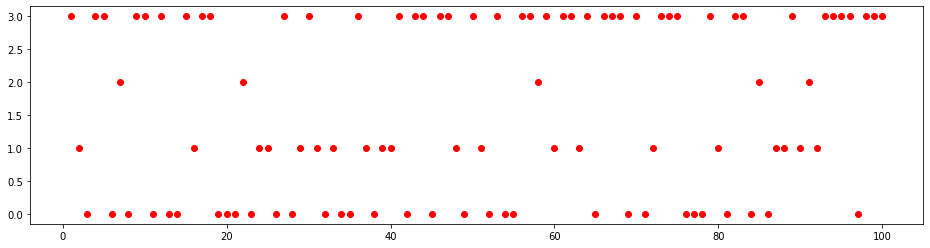

In [7]:
kmeans = KMeans(n_clusters = k, init= 'k-means++', random_state = 0)
kmeans.fit(X)

Y_pred_K= kmeans.predict(X) 
print(Y_pred_K)

#showing the clusters of first 100 persons
plt.figure(figsize=(16,4))
plt.plot(range(1,100+1),Y_pred_K[:100],'ro')

In [18]:
centers = kmeans.cluster_centers_

In [19]:
cluster0 = [x for x,y in zip(X,Y_pred_K) if y==0]

In [32]:
cluster0

[array([ 0.44713513,  0.51808382, -0.10766823,  0.10888851, -0.45457623,
        -0.46678555,  1.26984323,  2.67345108, -0.91699519, -0.67534886,
        -0.47606982, -0.10902012,  0.82606173, -0.38380474, -0.10166318,
        -0.52555097,  0.36067954]),
 array([ 0.11787839,  0.51808382,  0.15449229, -0.35693402,  1.01982197,
        -0.46678555,  0.4393103 , -0.67866081,  0.55078403, -0.67534886,
        -0.47606982, -0.26994537, -0.74055703, -0.11505954,  0.66211861,
        -0.52555097,  0.36067954]),
 array([ 0.12452002,  0.51808382, -0.26538766, -0.35693402,  0.02779244,
        -0.46678555,  1.26984323, -0.67866081,  1.59919919, -0.67534886,
        -0.47606982, -0.10902012, -0.60313433, -0.36411553, -0.14253532,
        -0.52555097,  0.36067954]),
 array([-0.13036795,  0.51808382, -0.03888801, -0.35693402,  0.56293193,
        -0.46678555,  1.26984323, -0.67866081,  1.59919919, -0.67534886,
        -0.47606982, -0.10902012, -0.90546427, -0.22447836,  0.56147389,
        -0.52555

In [22]:
distances = np.array([np.linalg.norm(centers[0] - x) for x in cluster0])

In [31]:
distances

array([3.48162883, 2.1711173 , 1.92285021, ..., 4.63089151, 4.64940069,
       4.59575309])

In [23]:
mean_dist = distances.mean()

In [24]:
outlayers = distances > mean_dist

In [25]:
print(outlayers)

[ True False False ...  True  True  True]


In [30]:
outlayers.astype(int).sum()

1467